# A) Run tSNE library/package on MNIST and 20NG datasets, to obtain a representation is 2-dim or 3-dim, and visualize the data by plotting datapoints with a color per label. Try different values for perplexity like 5, 20 and 100.

## MNIST

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

/home/khairnar.as/.conda/envs/myenv/lib/python3.8/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
mnist_x = mnist.data
mnist_y = mnist.target

In [3]:
import numpy as np
mnist_x = mnist_x - np.mean(mnist_x, axis=0)

In [4]:
mnist_y = mnist_y.astype(int)

In [5]:
import numpy as np
mnist_sub_x = []
mnist_sub_y = []

for i in range(10):
    idx = np.where(mnist_y == i)[0]
    selected_idx = idx[:2000] 

    mnist_sub_x.append(mnist_x[selected_idx])
    mnist_sub_y.append(mnist_y[selected_idx])

mnist_sub_x = np.concatenate(mnist_sub_x, axis=0)
mnist_sub_y = np.concatenate(mnist_sub_y, axis=0)


In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 50)
mnist_sub_x = pca.fit_transform(mnist_sub_x)

In [7]:
mnist_sub_x.shape

(20000, 50)

In [8]:
mnist_sub_y.shape

(20000,)

In [9]:
# n_comp = 2, perplexity=5
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=5, early_exaggeration=50, random_state=42)
X_new = tsne.fit_transform(mnist_sub_x)

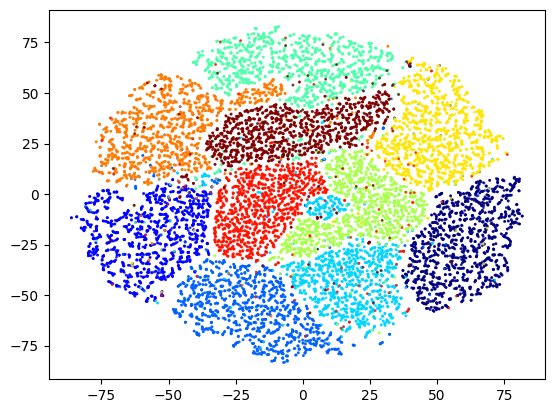

In [10]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=mnist_sub_y, cmap="jet", alpha=0.7, s=1)

In [11]:
# n_comp = 2,  perplexity = 50
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=50, early_exaggeration=100, random_state=42)
# tsne = TSNE(n_components=2, perplexity=20, random_state=42)

X_new = tsne.fit_transform(mnist_sub_x)

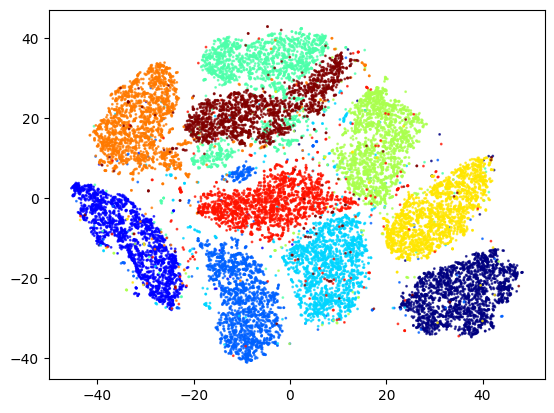

In [12]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=mnist_sub_y, cmap="jet", alpha=0.7, s=1)

In [14]:
# n_comp = 2,  perplexity = 100

import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=100, random_state=42)
X_new = tsne.fit_transform(mnist_sub_x)

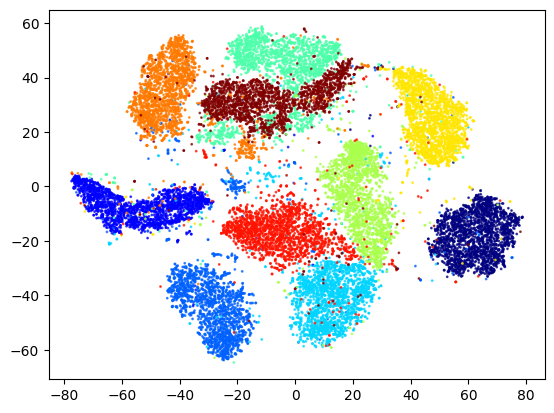

In [16]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=mnist_sub_y, cmap="jet", alpha=0.7, s=1)

## 20 Ng

In [17]:
def read_20ng_and_convert(file_path = '20ng.csv'):
    from sklearn.feature_extraction.text import TfidfVectorizer
    import pandas as pd

    df = pd.read_csv(file_path)
    df['index'] = df['index'].str.replace(r'\d+$', '', regex=True)
    classes = ["alt.atheism", "sci.med", "sci.electronics", "comp.graphics", "talk.politics.guns", "sci.crypt"]
    df = df[df['index'].isin(classes)]
    vectorizer = TfidfVectorizer(use_idf=False)
    # vectorizer = TfidfVectorizer(use_idf=False)
    sparse_matrix = vectorizer.fit_transform(df['content'])
    sparse_df = pd.DataFrame.sparse.from_spmatrix(sparse_matrix, columns=vectorizer.get_feature_names_out())
    sparse_df_mean = sparse_df.mean(axis=0)
    sparse_std_sub = sparse_df.sparse.to_dense().std(axis=0)
    sparse_df = (sparse_df - sparse_df_mean)/sparse_std_sub
    sparse_df['index'] = df['index'].to_numpy()
    return sparse_df

In [18]:
df_20ng = read_20ng_and_convert()

In [50]:
df_20ng_x = df_20ng.drop('index', axis=1)
df_20ng_y = df_20ng['index'].to_numpy()

In [52]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 300)
df_20ng_x = df_20ng_x.to_numpy()
df_20ng_x = pca.fit_transform(df_20ng_x)

In [53]:
# n_comp = 2, perplexity=5
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, perplexity=50, metric='cosine')
X_20ng_new = tsne.fit_transform(df_20ng_x)

In [58]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_20ng_y = label_encoder.fit_transform(df_20ng_y)


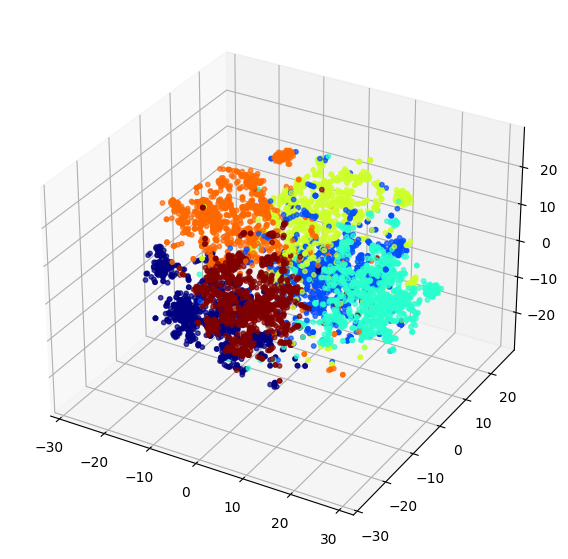

In [60]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_20ng_new[:, 0], X_20ng_new[:, 1], X_20ng_new[:, 2],
    c=y_encoded, cmap='jet', alpha=0.7, s=10
)

In [66]:
import plotly.express as px
import pandas as pd

df_plot = pd.DataFrame(X_20ng_new[:, :3], columns=['X', 'Y', 'Z'])

df_plot['Label'] = df_20ng_y 

fig = px.scatter_3d(
    df_plot,
    x='X', y='Y', z='Z',
    color='Label', 
    opacity=0.7,
    size_max=10
)

fig.update_traces(marker=dict(size=2))

fig.update_layout(
    title="Interactive 3D Scatter Plot of 20 Newsgroups Data",
    legend_title="Newsgroup",
    margin=dict(l=0, r=0, b=0, t=50)
)

fig.show()

# B

In [ ]:
X_new.shape

(20000, 2)

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.55, min_samples=25)

dbscan.fit(X_new)

DBSCAN(eps=1.55, min_samples=25)

In [ ]:
y_pred = dbscan.labels_

In [ ]:
len(y_pred[y_pred == -1])

603

In [ ]:
np.unique(y_pred)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

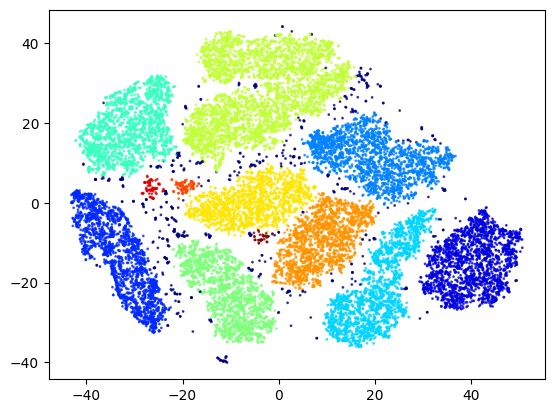

In [ ]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_pred, cmap="jet", alpha=0.7, s=1)

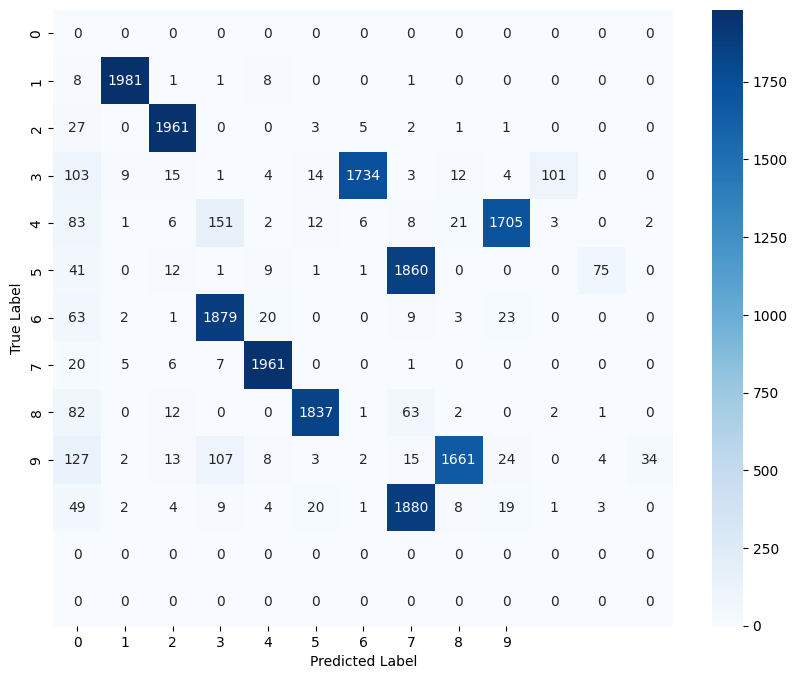

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


cm = confusion_matrix(mnist_sub_y, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()